In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import sklearn
import numpy as np
np.random.seed(40)

# 9. 비지도 학습

- 실제 사용하는 데이터에는 대부분 레이블이 없다.
    - 수동으로 레이블링하기에는 시간이 오래 걸리고 비용이 많이 든다.
    - 그래서 보통 전체 사진 중에서 일부분만 작업하고 레이블 된 데이터셋은 아주 작다.
---
### 비지도 학습의 종류
1. 군집(clustering)
    - 비슷한 샘플을 cluster로 모은다. 추천 시스템, 검색 엔진, 이미지 분할, 차원 축소 등에 사용
2. 이상치 탐지(outlier detection)
    - '정상'데이터가 어떻게 보이는지를 학습 => 비정상 샘플을 감지.
    - 제조 라인 결함 감지, 시계열 데이터에서 새로운 트렌드 찾기
3. 밀도 추정(density estimation)
    - 데이터셋 생성 확률 과정의 확률 밀도 함수를 추정
    - 이상치 탐지에 사용된다.(밀도가 매우 낮은 영역에 놓은 샘플이 이상치일 확률이 크다는 것을 이용)
    - 데이터 분석과 시각화에도 사용

# 9.1 군집
- 비슷한 샘플을 구별해 하나의 cluster 또는 비슷한 샘플의 그룹으로 할당하는 작업

In [33]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

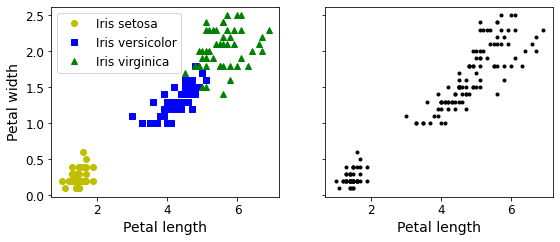

In [34]:
plt.figure(figsize=(9, 3.5)) #figsize 정의(그래프의 크기 정의)

plt.subplot(121) #subplot(121) => subplot(1, 2, 1)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa") #'y: yellow, o: markerstyle'
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122) #subplot(122) => subplot(1, 2, 2)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

- 왼쪽은 분류, 오른쪽은 군집(clustering)
--- 
#### 군집은 다양한 애플리케이션에서 사용
1. 고객 분류
    - 고객을 구매 이력이나 웹사이트 내 행동을 기반으로 클러스터로 모을 수 있다. => 추천시스템에 이용할 수 있음.<br><br>
2. 데이터 분석
    - 새로운 데이터셋을 분석할 때 군집 알고리즘을 실행하고 각 클러스터를 따로 분석하면 도움이 된다.<br><br>
3. 차원 축소 기법
    - 한 데이터셋에 군집 알고리즘을 적용하면 각 클러스터에 대한 샘플의 '친화성(affinity)'을 측정할 수 있다. 각 샘플의 특성 벡터를 친화성의 벡터로 바꾼다면, 일반적으로 원본 특성 벡터보다 훨씬 저차원이 된다.<br><br>
4. 이상치 탐지
    - 모든 클러스터에 친화성이 낮은 샘플은 이상치일 가능성이 높다. => 제조 분야 결함 감지나 부정거래 감지에 활용될 수 있다.<br><br>
5. 준지도 학습
    - 레이블된 샘플이 적다면 군집을 수행하고 동일한 클러스터에 있는 모든 샘플에 레이블을 전파. => 지도 학습에 필요한 데이터의 레이블이 증가.(성능 향상)<br><br>
6. 검색 엔진
    - 데이터 베이스의 모든 이미지에 군집 알고리즘 적용 => 사용자가 찾으려는 이미지와 동일(유사)한 클러스터의 모든 이미지를 반환<br><br>
7. 이미지 분할
    - 색을 기반으로 픽셀을 클러스터로 모은다. 이후 각 픽셀의 색을 해당 클러스터의 평균 색으로 바꾼다. => 물체탐지 및 추적 시스템에서 사용


## 9.1.1 k-평균

In [35]:
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [36]:
from sklearn.cluster import KMeans
k = 5 #k개수를 지정 => 쉬운일은 아니다.
kmeans= KMeans(n_clusters = k)
y_pred = kmeans.fit_predict(X)
y_pred
#군집에서 샘플의 레이블이란
    #알고리즘이 샘플에 할당한 클러스터의 인덱스를 말한다.

array([4, 0, 1, ..., 2, 1, 0])

In [37]:
y_pred is kmeans.labels_

True

In [38]:
#5개의 클러스터 중심(센트로이드) 찾기
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [39]:
#새로운 샘플(X_new)에 대한 레이블도 예측할 수 있다.
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

##### 결정경계 그리기

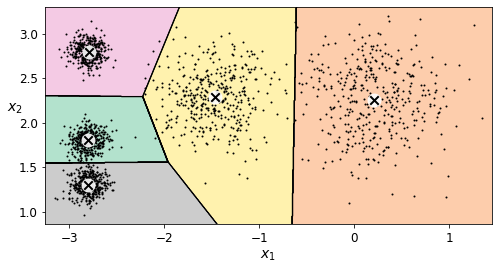

In [40]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12, 
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

- 클러스터의 경계부분에 있는 샘플들이 보임
    - 실제로 k-평균 알고리즘은 클러스터의 크기가 많이 다르면 잘 작동하지 않는다.  
    (샘플을 클러스터에 할당할 때 센트로이드까지 거리만 고려하기 때문이다)

##### 하드군집 vs 소프트군집
- 하드 군집: 샘플을 하나의 클러스터에 할당(가장 가까운)
- 소프트 군집: 각 센트로이드까지 거리를 반환($\approx$유사도 점수, 친화성 점수)
    - 단, 거리는 작을수록, 유사도 점수는 높을수록 해당 클러스터에 가깝다.

In [41]:
#새로운 샘플(X_new)에 있는 샘플들과 각 센트로이드까지의 거리를 반환
kmeans.transform(X_new)
#이러한 방식은 효율적인 비선형 차원축소 기법이 될 수 있다.

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

#### k-평균 알고리즘
- 센트로이드가 주어진다면 아무 문제가 없다. 쉬운 방법임
- 하지만 센트로이드가 주어지지 않는다??
    - 센트로이드를 랜덤하게 선정 => (샘플에 레이블 할당 -> 센트로이드 업데이트) 계속 반복
    - 센트로이드에 변화가 없을 때까지 계속 반복<br>

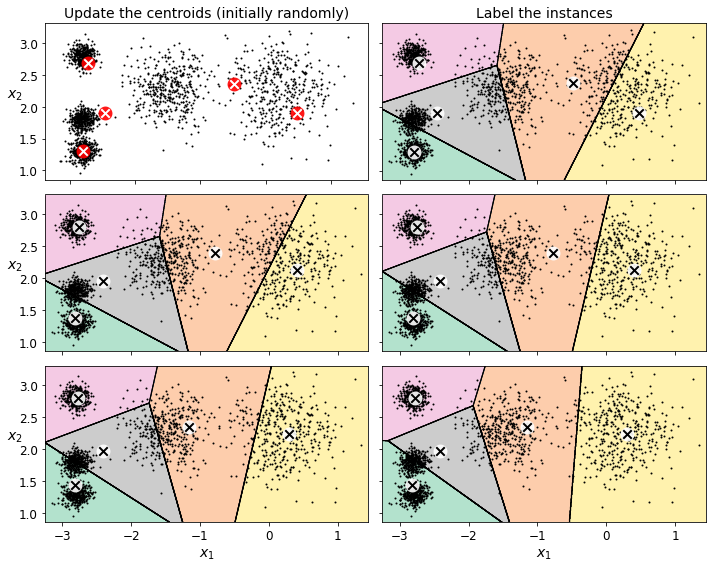

- k-평균의 계산 복잡도: 샘플개수(m), 클러스터 개수(k), 차원 개수(n)에 선형적이다.(데이터가 군집할 수 없는 구조를 가지면, 복잡도가 급격히 증가할 수 있지만 실제로는 드물다)<br><br>
- 위 방법이 적절한 솔루션에 다다르기 위해서는 센트로이드 초기화가 필수적이다.

#### 센트로이드 초기화 방법(이너셔)
- 센트로이드 위치를 근사하게 알 수 있다면?
    - 랜덤하게 n번 초기화 => 이너셔(inertia)
        - 이너셔(inertia): 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱거리
    - 알고리즘을 n번 반복하여 이너셔가 가장 낮은 모델을 반환.

In [42]:
#init매개변수에 센트로이드 리스트를 담은 넘파이 배열을 지정
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])

#n_init = 1로 지정
    #n_init: 랜덤 초기화 횟수(기본값 = 10)
            #fit() 메서드를 호출할 때 앞의 전체 알고리즘이 10회 실행된다.
kmeans = KMeans(n_clusters = 5, init=good_init, n_init = 1)

In [45]:
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1)

In [46]:
kmeans.inertia_ 

211.59853725816836

In [47]:
kmeans.score(X) 
#score() 메서드는 음수값을 반환 => 예측기의 score()메서드는 사이킷런의
        #'큰 값이 좋은 값이다'라는 규칙을 따라야하기 때문에
        #한 예측기가 다른 것보다 좋다면 sco

-211.59853725816836

##### k-평균++ 초기화 알고리즘
1. 데이터셋에서 무작위로 균등하게 하나의 센트로이드 $c_{(1)}$을 선택
2. $D(x^{(i)})^2 / \sum_{i=1}^mD(x^{(j)})^2$의 확률로 샘플 $x^{(i)}$를 새로운 센트로이드 $c_{(i)}$로 선택한다. 여기서 $D(x^{(i)})$는 샘플 $x^{(i)}$와 이미 선택된 가장 가까운 센트로이드까지 거리. 이 확률 분포는 이미 선택한 센트로이드에서 멀리 떨어진 샘플을 다음 센트로이드로 선택하게함.
3. k개의 센트로이드가 선택될 때까지 이전 단계를 반복한다.
--- 
- 이전의 초기화 방법: k개의 샘플을 랜덤하게 선택하여 초기 샌트로이드로 설정
- KMeans 클래스는 기본적으로 k-평균++초기화 알고리즘을 사용. 만약, 이전의 방법을 사용하고 싶다면, init= 'random'으로 하면됨.

##### k-평균 속도 개선과 미니배치 k-평균
- 속도 개선
    1. '삼각 부등식'사용(두 점 사이의 직선은 항상 짧은 거리(KMeans에서 기본적으로 사용)  
        => 희소행렬에서는 algorithm = 'full'  
        => 밀집행렬에서는 algorithm = 'elkan'(기본?)
    2. 미니 배치 사용(MiniBatchKMeans)

In [49]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

C:\Users\alsrl\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


MiniBatchKMeans(n_clusters=5, random_state=42)

In [50]:
minibatch_kmeans.inertia_

211.65239850433204

- 데이터셋이 메모리에 들어가지 않으면 => memmap 클래스 사용 또는 MiniBatchKMeans 클래스의 partial_fit()을 사용
    - 그렇지만 초기화 여러 번 수행, 결과에서 직접 좋은 것 고르기 등,,,해야할 일이 많음.
--- 
평균적으로 미니배치 kmeans가 일반 kmeans보다 속도는 빠르지만, 이너셔는 조금 더 나쁘다. 특히 클러스터의 개수가 증가할 때!  
       

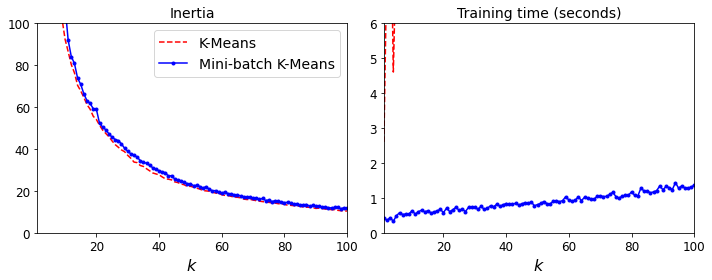

- 왼쪽이 이너셔 값, 오른쪽이 훈련시간
    - 훈련 시간은 미니배치가 훨씬 빠른 것을 확인
    - 하지만 이너셔의 경우, 미니배치 k-평균의 이너셔가 항상 일반 k-평균보다 조금 높다.

##### 최적의 클러스터 개수 찾기
- 단순하게, 이녀서가 작은 모델을 선택하면 되지 않을까??
    - 절대 그렇지 않음. 이녀서는 가장 가까운 센트로이드와의 평균 제곱거리를 뜻하는데, 따라서 k가 커질수록 이너셔가 작아지기 때문에다.

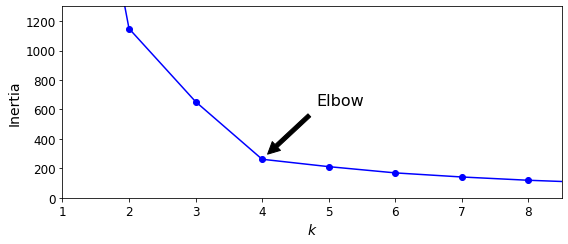

- k=4 지점이 엘보(빠르게 감소하다가, 그 증가세가 완만해지는 지점)
--- 
더 정확한 방법: **실루엣 점수(silhouette score)**
- 모든 샘플에 대한 실루엣 계수의 평균
    - 실루엣 계수: $(b-a) \over max(a, b)$
        - a: 동일한 클러스터에 있는 다른 샘플까지의 평균 거리(클러스터 내부 평균 거리)
        - b: 가장 가까운 클러스터까지 평균 거리(자신이 속한 클러스터는 제외하고 가장 가까운 클러스터의 샘플까지 평균 거리)<br><br>
    - 실루엣 계수는 -1 ~ +1까지.
        - +1에 가까우면 자신의 클러스터에 잘 속해있고, 다른 클러스터와 멀다
        - -1에 가까우면 잘못된 클러스터에 할당되어 있다는 것.

In [51]:
from sklearn.metrics import silhouette_score
#사이킷 런의 silhouette_score() 함수 사용
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [53]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

C:\Users\alsrl\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [54]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

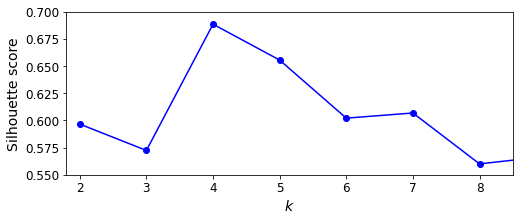

In [55]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

###### 실루엣 다이어그램
- 클러스터마다 칼 모양의 그래프 => 그래프의 높이는 클러스터가 포함하는 샘플의 개수
- 수직 파선: 각 클러스터 개수에 해당하는 실루엣 점수를 나타낸다.
    - 파선을 넘어서 뻗어야 좋은거,,,
    - 파선을 넘지 못한다 = 다른 클러스터와 가깝다.

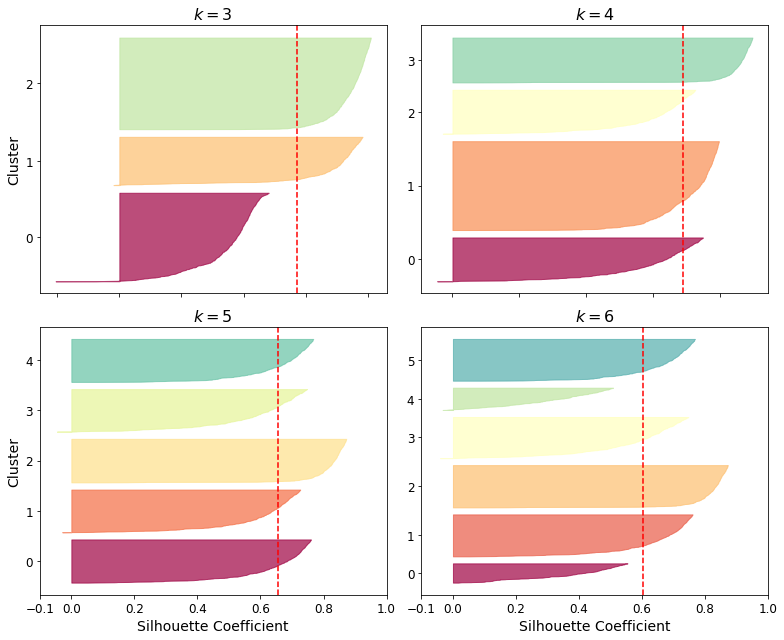

## 9.1.2 k-평균의 한계
- 최적이 아닌 솔루션을 피하려면 알고리즘을 여러번 실행.
- 클러스터의 개수를 지정
- 클러스터의 크기나 밀집도가 서로 다르거나 원형이 아닐경우 잘 작동하지 않는다.

## 9.1.3 군집을 사용한 이미지 분할
- 이미지 분할(image segmentation): 이미지를 segment 여러 개로 분할하는 작업.
    - 시맨틱 분할(semantic segmentation): 동일한 종류의 물체에 속한 모든 픽셀은 같은 segment에 할당. 
    - 색상 분할(color segmentattion): 동일한 색상을 가진 픽셀을 같은 segment에 할당.

In [ ]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

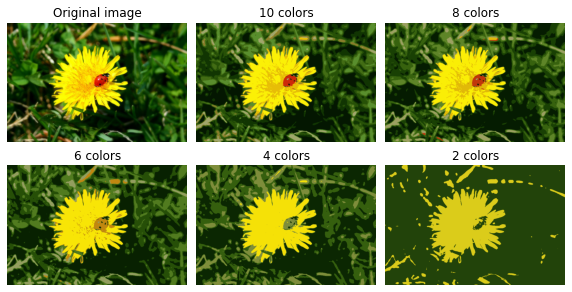

## 9.1.4 군집을 사용한 전처리

In [71]:
from sklearn.datasets import load_digits
#데이터 가져오기
X_digits, y_digits = load_digits(return_X_y=True)

#훈련 세트와 테스트세트 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [72]:
from sklearn.linear_model import LogisticRegression#로지스틱 회귀 모델
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
#multi_class => 다중 분류 시에 ovr, multinomial, auto로 설정
#solver => 최적화 문제에 사용하는 알고리즘 lbfgs

log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [73]:
#테스트 세트에서 정확도 평가
log_reg_score = log_reg.score(X_test, y_test) 
log_reg_score

0.9688888888888889

In [75]:
from sklearn.pipeline import Pipeline
#파이프라인 만들기

pipeline = Pipeline([#클러스터 50개 => 숫자가 10개지만 더 큰 수로 하는게 좋음
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
#1. 파이프라인 만들어서 훈련 세트 50개의 클러스터로 모은다.
    #2. 이미지를 50개 클러스터까지 거리로 바꾼다.
    #3. 로지스틱 회귀 모델을 적용한다. 
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [77]:
pipeline.score(X_test, y_test) #정확도가 조금 더 좋아짐

0.9777777777777777

- 클러스터 개수를 임의로 정하지 말고, 조금 더 좋은 k값을 찾아보자

In [78]:
#전처리 과정이니까, k값을 찾는 일이 더 쉽다. 
    #실루엣 분석, 이너셔 증감 확인 필요가 없음.
    #가장 좋은 k 값 = 교차 검증에서 가장 좋은 분류 성능을 내는 값
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.1s
[CV] END ...............................kmeans_

[CV] END ..............................kmeans__n_clusters=35; total time=   1.4s
[CV] END ..............................kmeans__n_clusters=36; total time=   1.9s
[CV] END ..............................kmeans__n_clusters=36; total time=   1.6s
[CV] END ..............................kmeans__n_clusters=36; total time=   1.5s
[CV] END ..............................kmeans__n_clusters=37; total time=   1.8s
[CV] END ..............................kmeans__n_clusters=37; total time=   1.7s
[CV] END ..............................kmeans__n_clusters=37; total time=   1.3s
[CV] END ..............................kmeans__n_clusters=38; total time=   1.6s
[CV] END ..............................kmeans__n_clusters=38; total time=   1.6s
[CV] END ..............................kmeans__n_clusters=38; total time=   1.6s
[CV] END ..............................kmeans__n_clusters=39; total time=   1.6s
[CV] END ..............................kmeans__n_clusters=39; total time=   1.7s
[CV] END ...................

[CV] END ..............................kmeans__n_clusters=69; total time=   2.0s
[CV] END ..............................kmeans__n_clusters=70; total time=   2.3s
[CV] END ..............................kmeans__n_clusters=70; total time=   2.2s
[CV] END ..............................kmeans__n_clusters=70; total time=   2.1s
[CV] END ..............................kmeans__n_clusters=71; total time=   1.9s
[CV] END ..............................kmeans__n_clusters=71; total time=   2.1s
[CV] END ..............................kmeans__n_clusters=71; total time=   2.3s
[CV] END ..............................kmeans__n_clusters=72; total time=   2.1s
[CV] END ..............................kmeans__n_clusters=72; total time=   2.0s
[CV] END ..............................kmeans__n_clusters=72; total time=   2.3s


C:\Users\alsrl\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..............................kmeans__n_clusters=73; total time=   2.4s
[CV] END ..............................kmeans__n_clusters=73; total time=   2.2s
[CV] END ..............................kmeans__n_clusters=73; total time=   1.9s
[CV] END ..............................kmeans__n_clusters=74; total time=   1.9s
[CV] END ..............................kmeans__n_clusters=74; total time=   2.2s
[CV] END ..............................kmeans__n_clusters=74; total time=   2.1s
[CV] END ..............................kmeans__n_clusters=75; total time=   2.1s
[CV] END ..............................kmeans__n_clusters=75; total time=   2.3s
[CV] END ..............................kmeans__n_clusters=75; total time=   2.0s
[CV] END ..............................kmeans__n_clusters=76; total time=   2.0s
[CV] END ..............................kmeans__n_clusters=76; total time=   2.1s
[CV] END ..............................kmeans__n_clusters=76; total time=   1.8s
[CV] END ...................

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [81]:
#최선의 k값과 이 때의 파이프라인 성능을 확인
grid_clf.best_params_

{'kmeans__n_clusters': 95}

In [80]:
grid_clf.score(X_test, y_test) #성능이 훨씬 좋아짐

0.9777777777777777

## 9.1.5 군집을 사용한 준지도 학습
- 레이블이 없는 데이터가 많고, 레이블이 있는 데이터는 적을 때 사용

In [87]:
n_labeled = 50 #레이블이 있는 샘플이 50개만 있다고 가정 
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test) #정확도는 83%

0.8333333333333334

- 훈련 세트를 50개의 클러스터로 모으고, 각 클러스터에서 센트로이드에 가장 가까운 이미지를 찾는다.
    - 이런 이미지를 대표 이미지(representative image)라고 한다. 

In [91]:
k= 50 #50개의 클러스터
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

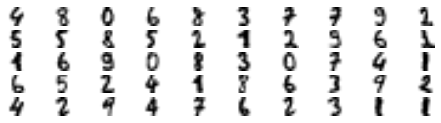

In [92]:
plt.figure(figsize=(8, 2))


for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')
    
    
plt.show()

In [93]:
y_train[representative_digit_idx]

array([4, 8, 0, 6, 8, 3, 7, 7, 9, 2, 5, 5, 8, 5, 2, 1, 2, 9, 6, 1, 1, 6,
       9, 0, 8, 3, 0, 7, 4, 1, 6, 5, 2, 4, 1, 8, 6, 3, 9, 2, 4, 2, 9, 4,
       7, 6, 2, 3, 1, 1])

In [95]:
y_representative_digits = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
    1, 2, 9, 5, 2, 7, 8, 1, 8, 6,
    3, 1, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9])

In [98]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.09555555555555556

- 레이블 전파
    - 레이블이 동일한 클러스터에 있는 모든 샘플로 레이블을 전파

In [101]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [102]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.09555555555555556

- 센트로이드와 가까운 샘플의 20%에만 레이블을 전파

In [103]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [104]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [105]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [107]:
log_reg.score(X_test, y_test) #약간 더 개선된 모습이다.

0.15555555555555556

In [108]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.18900343642611683

##### 능동학습을 여러 번 반복
- 모델과 훈련 세트를 지속적으로 향상하기 위해 다음 단계로 능동학습(active learning)을 몇 번 반복할 수 있다.
- 불확실성 샘플링(uncertainty sampling) 
    1. 레이블된 샘플에서 모델을 훈련 => 모델을 사용해 레이블되지 않은 모든 샘플에 대한 예측을 만든다.
    2. 모델이 가장 불확실하게 예측한 샘플(추정 확률이 낮은 샘플)을 레이블 한다.
    3. 레이블을 부여하는 노력만큼의 성능이 향상되지 않을 때까지 반복.
    

## 9.1.6 DBSCAN
- 밀집된 연속적 지역을 클러스터로 정의
    1. 알고리즘이 각 샘플에서 작은 거리 $\epsilon$내에 샘플이 몇 개 놓여있는지 count. => 이 지역을 샘플의 $\epsilon$-이웃내이라고 한다.
    2. $\epsilon$-이웃내에 적어도 min_samples개 샘플이 있다면 이를 핵심 샘플(core instance)로 간주한다. 즉, 핵슴 샘플= 밀집된 지역에 있는 샘플
    3. 핵심 샘플의 이웃에 있는 모든 샘플은 동일한 클러스터에 속한다.
    4. 핵심 샘플이 아니고 이웃도 아닌 샘플을 이상치로 분류.

In [2]:
from sklearn.cluster import DBSCAN #predict()메서드 제공하지 않음
                                    #fit_predict()메서드 제공 => 새로운 샘플에 대한 예측이 안된다.
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 1000, noise = 0.05)
dbscan = DBSCAN(eps =0.05, min_samples = 5) #eps = 앱실론(기준이 되는 거리)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [3]:
dbscan.labels_

array([ 0,  0,  0,  1,  1,  2,  3,  0,  2,  4,  5,  3,  4,  0,  3,  2,  1,
        9, -1,  3,  3,  0,  1,  6,  6,  0,  5, -1,  0,  1,  6,  0,  7,  3,
        0, -1, -1,  3,  0,  0,  1,  5, -1,  0,  0,  6,  2,  0,  3,  1,  2,
        1,  4,  7,  1,  8,  2,  0,  0,  0,  0,  8,  0, -1,  0,  0,  1,  4,
        2,  7,  3,  6, -1, -1,  0,  1, -1,  0,  8,  8,  6,  0,  6,  4,  0,
        0,  0,  5,  3,  1,  4,  1,  4,  0,  3,  2,  9,  1, -1, -1,  3,  0,
        1,  0,  4,  4,  7,  2,  0,  0,  2,  4,  3,  4,  2,  0,  7,  0,  1,
        1,  0,  1,  0,  3,  3, -1, -1,  0,  4,  0,  4,  2, -1, 10,  7,  6,
        3,  1,  0,  0,  1,  1,  9,  0,  7,  8,  6,  1,  1,  3,  1,  1,  0,
        1,  1,  0,  2,  4,  2,  1,  0,  2,  0,  4,  1,  1,  0,  0,  2,  0,
        3,  1, -1,  1,  2,  0,  2,  4,  1,  4,  1,  6,  0,  5,  0,  9,  1,
        1,  1,  5,  3,  1,  0,  0,  2,  5,  2,  1,  8,  0,  3,  2,  2, 10,
        8,  3,  3,  0,  7,  0,  0,  5,  0,  2,  8,  6,  2,  1,  3,  2,  0,
        3,  7,  9,  0,  3

In [4]:
#핵심 샘플의 인덱스는 인스턴스 변수 core_sample_indices_에서 확인
len(dbscan.core_sample_indices_)

793

In [5]:
dbscan.core_sample_indices_

array([  0,   1,   3,   4,   5,   6,   7,   8,   9,  10,  11,  13,  14,
        15,  16,  19,  20,  21,  22,  23,  24,  28,  29,  30,  31,  32,
        33,  34,  37,  38,  39,  40,  41,  43,  44,  45,  46,  47,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  64,
        65,  67,  68,  69,  71,  74,  75,  77,  78,  80,  81,  82,  83,
        84,  85,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
       100, 102, 103, 104, 105, 106, 107, 109, 110, 111, 113, 114, 115,
       117, 118, 119, 120, 121, 122, 123, 124, 127, 128, 129, 130, 131,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 170, 171, 173, 175, 176, 177,
       178, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
       205, 206, 208, 209, 210, 212, 213, 214, 215, 216, 217, 21

In [6]:
dbscan.components_

array([[ 1.04408307,  0.27580134],
       [ 0.38519953,  0.97356418],
       [ 1.6557226 , -0.25987268],
       ...,
       [-0.2980114 ,  0.98441734],
       [ 0.11470474,  0.07667196],
       [ 0.38831946,  0.93320572]])

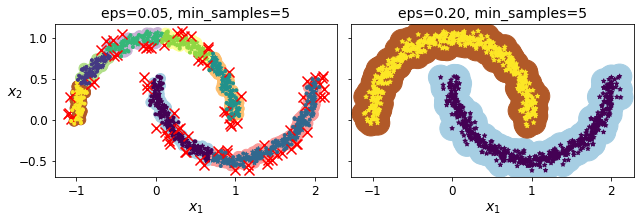

- 왼쪽: 군집 7개, 많은 샘플이 이상치로 탐지됨(X표시)
- 오른쪽: 군집 2개

In [7]:
#DBSCAN은 예측에 사용할 수 없으므로 KNeighborsClassifier 사용

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [9]:
import numpy as np
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([7, 5, 0, 1], dtype=int64)

In [10]:
knn.predict_proba(X_new)

array([[0.  , 0.  , 0.02, 0.  , 0.  , 0.24, 0.  , 0.74, 0.  , 0.  , 0.  ,
        0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  ],
       [0.7 , 0.  , 0.  , 0.18, 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.  ,
        0.  ],
       [0.  , 0.96, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.04]])

#### 결론
- DBSCAN은 매우 간단하고 강력하다.
    - 하이퍼파라미터 2개: eps, min_samples
---
- 단점
    - 클러스터 간의 밀집도가 크게 다르면, 모든 클러스터를 올바르게 잡아낼 수 없다.
    - 계산 복잡도는 O(m log m) => 샘플 개수에 대해 선형적으로 증가
    - 사이킷런의 구현에서 eps가 커지면 O(m^2)만큼 메모리가 증가

## 9.1.7 다른 군집 알고리즘

### 1. 병합군집(agglomerative clustering)
- 클러스터 계층을 밑바닥부터 위로 쌓아 구성 => 인접한 클러스터 쌍을 연결
- 트리의 리프는 개별 샘플
- 장점
    - 대규모 샘플과 클러스터에 잘 확장되며 다양한 형태의 클러스터 감지 가능
    - 특정 클러스터 개수를 선택하는데 도움이 되는 클러스터 트리 생성 가능
    - 이웃한 샘플 간의 거리를 담은  $m$x$m$크기 희소행렬을 연결 행렬로 전달하는 식으로 대규모 샘플에도 적용 가능
--- 
### 2. BIRCH
- 특별히 대규모 데이터셋을 위해 고안.
- 특성 개수가 20개 이하 => 배치 k-평균보다 더 빠르고 좋은 결과
---
### 3. 평균-이동
- 각 샘플을 중심으로 하는 원을 그리고 원마다 안에 포함된 모든 샘플의 평균을 구한다. => 원의 중심을 평균점으로 이동
- 원이 움직이지않을 때까지 평균-이동을 진행
- 동일한 지역에 안착한 원에 있는 모든 샘플은 동일한 클러스터
- DBSCAN과 유사
    - 모양이나 개수에 상관없이 클러스터 찾을 수 있음
    - 하이퍼파라미터가 적다
    - 국부적 밀집도 추정
- 대규모 데이터셋에선 적합하지 않음(계산 복잡도 문제)
---
### 4. 유사도 전파
- 투표 방식 사용
- 자신을 대표할 수 있는 비슷한 샘플에 투표 => 알고리즘이 수렴하면 각 대표와 투표한 샘플이 클러스터를 형성
- 대규모 데이터셋에서 적합하지 않음
---
### 5. 스펙트럼 군집
- 샘플 사이의 유사도 행렬을 받아 저차원 임베딩을 만든다.(차원 축소)
- 이 저차원 공간에서 다른 군집 알고리즘 사용
- 복잡한 클러스터 구조를 감지하고 그래프컷을 찾는데 사용
- 샘플 개수가 많거나, 클러스터의 크기가 매우 다르면 적합하지 않다.

# 9.2 가우시안 혼합
- 가우시안 혼합 모델: 샘플이 파라미터가 알려지지 않으 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델
    - 형성된 클러스터는 일반적으로 타원형

In [11]:
#GaussianMixture 클래스 -가장 간단한 버전의 변종 
        #=> 사전에 가우시안 분포의 개수 k를 알아야 한다.

In [12]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init = 10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [13]:
gm.weights_ #실제 이 데이터를 생성하기 위해 사용한 가중치는
            #0., 0.2, 0.6이다

array([0.19911437, 0.19668854, 0.60419709])

In [14]:
gm.means_

array([[-0.75457692,  0.54636111],
       [ 1.76810149, -0.04705427],
       [ 0.50391525,  0.24604295]])

In [15]:
gm.covariances_

array([[[ 0.05153951,  0.0609774 ],
        [ 0.0609774 ,  0.0891661 ]],

       [[ 0.04619582,  0.0566365 ],
        [ 0.0566365 ,  0.08465899]],

       [[ 0.18080007, -0.11144432],
        [-0.11144432,  0.29371994]]])

- 최적의 가중치를 찾기 위해 기댓값 최대화(EM)알고리즘 사용
    - 샘플을 클러스터에 할당(기댓값 단계)
    - 클러스터를 업데이트(최대화 단계)

In [16]:
gm.predict(X)

array([2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 0, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 1, 0, 1, 0, 2, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0,
       2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2, 1, 0, 1, 0, 2,
       0, 0, 1, 0, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 0, 2, 0, 1,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 2, 2, 1, 1, 0, 2,
       2, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 1, 2, 2, 0,
       2, 1, 0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2,
       0, 2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 2, 0, 1, 2,

In [17]:
gm.predict_proba(X)

array([[6.41423144e-087, 3.19020539e-023, 1.00000000e+000],
       [3.02330917e-016, 3.97511225e-114, 1.00000000e+000],
       [1.18131338e-054, 2.58272141e-048, 1.00000000e+000],
       ...,
       [7.57777718e-032, 7.88511370e-079, 1.00000000e+000],
       [2.19966316e-017, 9.72386250e-111, 1.00000000e+000],
       [8.92576958e-024, 1.04884862e-093, 1.00000000e+000]])

- 가우시안 혼합 모델은 생성모델이므로, 이 모델에서 새로운 샘플을 만들 수 있다.

In [20]:
X_new, y_new = gm.sample(6)
X_new

array([[-1.04846351,  0.21965539],
       [ 1.57112805, -0.31756324],
       [ 0.52265398, -0.42518455],
       [-0.21156118, -0.17251628],
       [ 0.24770907, -0.3298314 ],
       [ 0.85212912,  0.16244928]])

In [21]:
y_new

array([0, 1, 2, 2, 2, 2])

In [22]:
gm.score_samples(X) #확률밀도함수 추정
#점수의 지숫값을 계산하여 샘플의 위치에서 확률밀도함수 값 얻을 수 있음.

array([-1.84002471, -1.73112962, -1.44233276, -0.14286093, -0.12906198,
        0.06652837, -1.93271903, -1.78486587, -0.39482697, -1.17890578,
       -1.70441999, -1.70901194, -2.13420422, -1.62309099, -1.50081596,
       -0.16488178, -0.16798284, -1.31186096, -1.44912686, -1.65582818,
       -1.43960641, -1.70670534, -0.60777724, -1.697722  , -1.84791027,
       -1.84050961, -1.25899898, -1.82405618, -1.60419097,  0.05145917,
       -1.67433197, -1.59664248, -0.18379834, -1.64152117, -1.65505509,
       -1.57049251, -0.03242157, -1.5600671 , -1.71680046, -1.57025485,
       -0.58675073, -1.47426491, -1.40265599, -1.85379193, -1.67528451,
       -1.85622106, -0.4240049 , -1.53857279, -1.79217922, -1.82831831,
       -0.28583389, -0.60967173, -1.2046772 , -0.67215325, -0.55068152,
       -1.98573485, -0.74937636, -1.59942678, -1.87922242, -1.53047906,
       -1.99256806, -1.97255629, -1.48309901, -1.33021212, -1.68111695,
       -1.79300295, -1.42699543, -2.06297947, -0.89844527, -1.36

covariance_type 매개변수를 사용해 이 알고리즘이 찾을 공분산 행렬을 제한할 수 있습니다.

- "full"(기본값): 제약이 없습니다. 모든 클러스터가 어떤 크기의 타원도 될 수 있습니다.  
- "tied": 모든 클러스터가 동일하지만 어떤 타원도 가능합니다(즉, 공분산 행렬을 공유합니다).  
- "spherical": 모든 클러스터가 원형이지만 지름은 다를 수 있습니다(즉, 분산이 다릅니다).  
- "diag": 클러스터는 어떤 크기의 타원도 될 수 있지만 타원은 축에 나란해야 합니다(즉, 공분산 행렬이 대각 행렬입니다).  

## 9.2.1 가우시안 혼합을 사용한 이상치 탐지

이상치 vs 정상치
- 밀도가 낮은 지역에 있는 모든 샘플을 이상치로 간주
- 밀도 임계값을 설정 => 이상치의 기준이 될 수 있음
    - 거짓 양성비율을 조정함

In [23]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

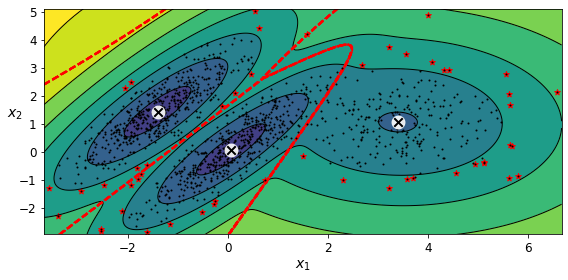

- 이것과 유사한 작업이 특이치 탐지 
    - 오염되지 않은 깨끗한 데이터셋에서 훈련한다는 것이 이상치 탐지와 다르다.

## 9.2.2 클러스터 개수 선택하기

In [29]:
gm.bic(X)

2792.040129405324

In [30]:
gm.aic(X)

2708.6082896626276

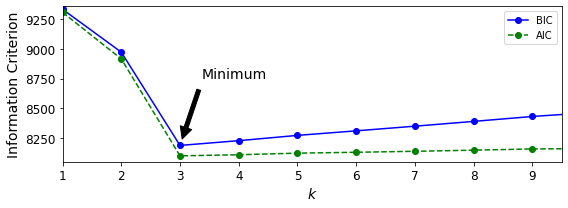

- k = 3이 최적 인듯? => VIC와 AIC가 둘다 최소가 됨

## 9.2.3 베이즈 가우시안 혼합 모델
- 사전 확률과 사전 믿음
- 가능도 함수, 사후확률

최적의 클러스터 개수를 수동으로 찾는 대신 BayesianGaussianMixture 클래스를 사용해 불필요한 클러스터의 가중치를 0으로 (또는 0에 가깝게) 만들 수 있습니다. 최적의 클러스터 개수보다 큰 컴포넌트의 개수를 지정하면 됩니다. 이 알고리즘은 자동으로 불필요한 클러스터를 제거합니다:

In [31]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [32]:
np.round(bgm.weights_, 2)

array([0.12, 0.14, 0.1 , 0.15, 0.16, 0.11, 0.11, 0.12, 0.  , 0.  ])

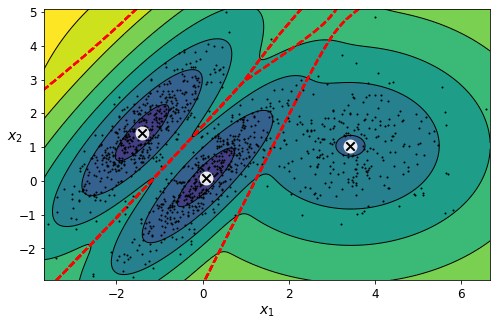

## 9.2.4 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘

#### 1. PCA
- 샘플의 재구성 오차와 이상치의 재구성 오차를 비교하면 일반적으로 이상치의 재구성 오차가 훨씬 크다는 점을 이용
---
#### 2. Fast-MCD(minimum-covariance determinant)
- EllipticEnvelope 클래스에서 구현된 알고리즘
- 데이터셋을 정제할 때 사용
- 샘플이 하나의 가우시안 분포에서 생성되었다고 가정한다. 
---
#### 3. 아이솔레이션 포레스트
- 고차원 데이터셋에서 이상치 감지를 위한 효율적인 알고리즘
- 무작위로 성장한 결정 트리로 구성된 랜덤 포레스트를 만든다.
    - 각 노드에서 특성을 랜덤하게 선택, 
    - 랜덤한 임계값을 골라 데이터셋을 2개로 나눈다. 
    - 위 단계를 반복 => 이상치는 다른 샘플과 멀리 떨어져 있음 => 평균적으로 정상 샘플과 적은 단계에서 격리된다.
---
#### 4. LOF(local outlier factor)
- 주어진 샘플 주위의 밀도와 이웃 주위의 밀도를 비교한다.
---
#### 5. one-class SVM
- 특이치 탐지에 알맞다.
- SVM으로 클래스를 분류하는데, 클래스가 1개 
    - => 원본 공간으로부터 고차원 공간에 있는 샘플을 분리
- 원본 공간에서는 모든 샘플을 둘러싼 작은 영역을 찾고 새로운 샘플이 이 영역에 안에 놓이지 않는다면 이상치로 분류함.